In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('../data/data.csv', index_col ='Date', parse_dates=True)


In [3]:
import pandas as pd

correlation_matrix = data.corr()

columns_to_drop = correlation_matrix.index[correlation_matrix['Close'] <= 0.5]
data_dropped = data.drop(columns=columns_to_drop)

data = data_dropped

In [4]:
data

,Open,High,Low,Close,Adj Close,7ma,14ma,21ma,MA5,MA10,...,14upper,14lower,21upper,21lower,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-30,8.450000,8.481429,8.366071,8.423214,7.131088,8.227855,8.094737,7.976232,8.251143,8.140321,...,8.384725,7.838133,8.487585,7.479966,93.433003,97.928200,99.677426,93.496539,85.442800,85.716090
2010-03-31,8.410357,8.450357,8.373571,8.392857,7.105389,8.269106,8.134486,8.014107,8.291357,8.179179,...,8.444695,7.826632,8.501422,7.555074,93.162923,97.374329,98.756406,90.741494,77.927574,76.665885
2010-04-01,8.478929,8.526071,8.312500,8.427500,7.134716,8.308704,8.173554,8.051688,8.357928,8.219607,...,8.504068,7.815065,8.505032,7.642077,92.892805,96.819954,97.834811,87.992607,70.530080,67.764691
2010-04-05,8.392143,8.518214,8.384643,8.517500,7.210911,8.360903,8.219414,8.094035,8.412143,8.277607,...,8.575990,7.817888,8.515909,7.725689,92.622653,96.265100,96.912734,85.252036,63.297895,59.099408
2010-04-06,8.507143,8.580000,8.464286,8.555000,7.242657,8.409427,8.264159,8.135941,8.463214,8.330429,...,8.643697,7.827170,8.568768,7.742865,92.352470,95.709791,95.990265,82.521923,56.276628,50.753147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,173.707135,174.630108,176.231379,173.310001,172.137999,...,180.489554,166.226159,186.764417,165.901298,94.782724,100.689175,104.270687,107.288145,123.055655,130.101563
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,174.947851,175.168760,176.453071,174.817999,173.092999,...,179.738854,166.679716,186.411193,165.979284,94.512882,100.138176,103.353919,104.534897,115.693240,121.627924
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,174.053387,174.662258,175.990974,174.491998,173.329999,...,178.035827,167.198457,185.692683,165.654935,94.242985,99.586556,102.436117,101.776935,108.201764,112.869208


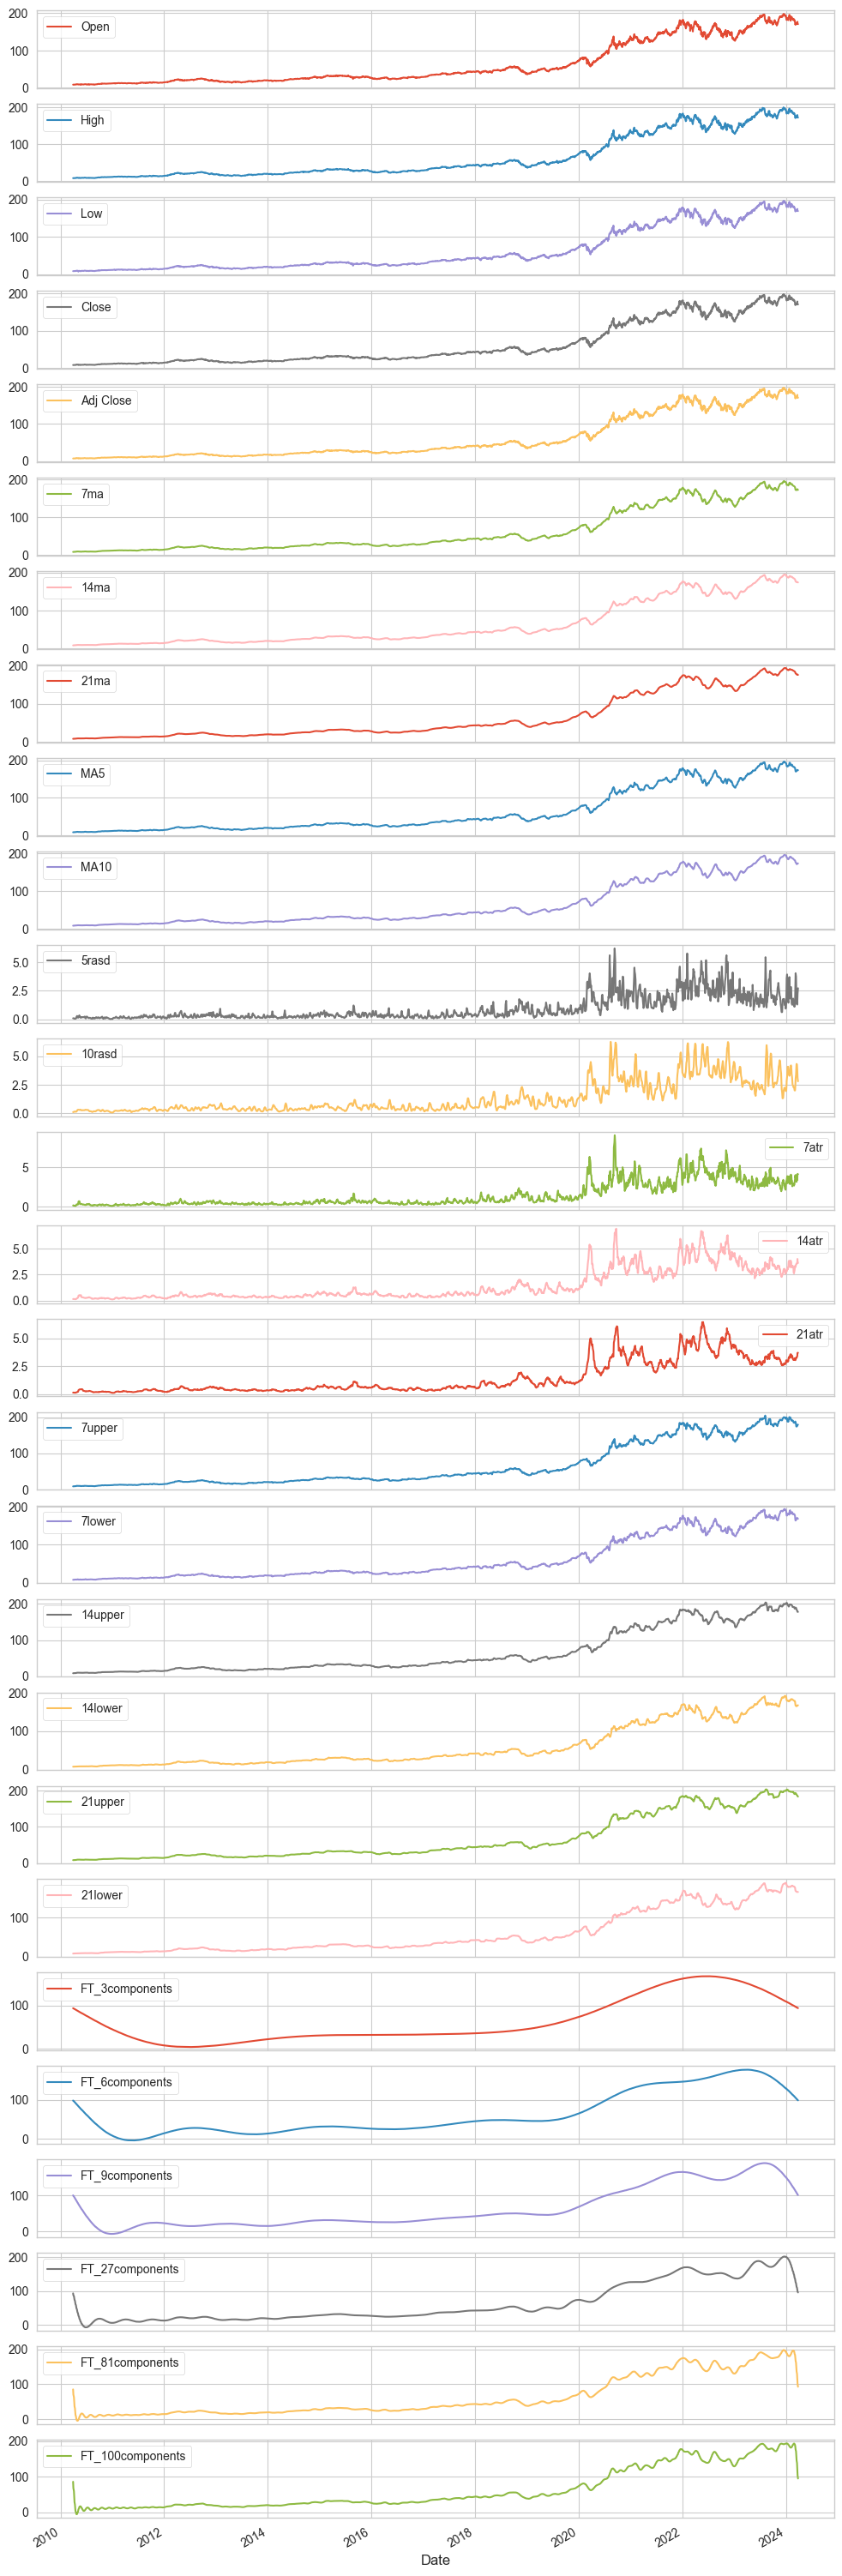

In [5]:
data.plot(legend=True,subplots=True, figsize = (12, 43))
plt.show()

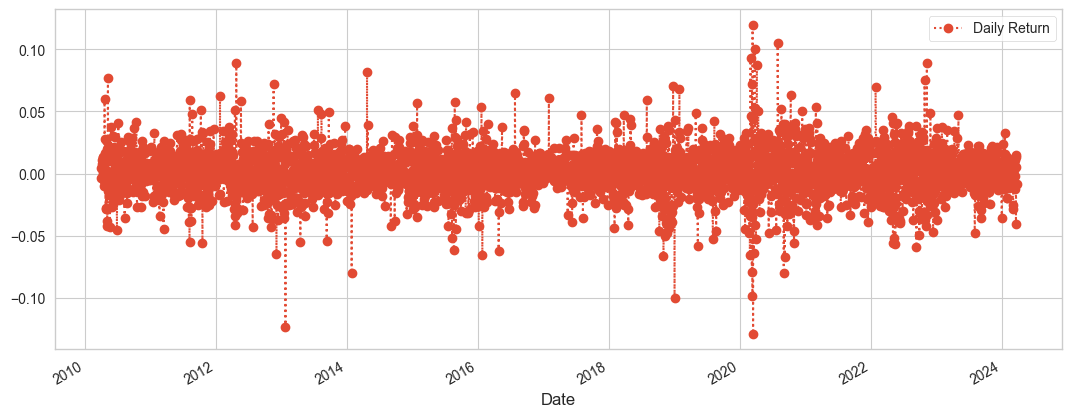

In [6]:
data['Daily Return'] = data['Close'].pct_change()
data['Daily Return'].plot(figsize=(13, 5),legend=True,linestyle=':',marker='o')
plt.show()

/Users/juwon/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


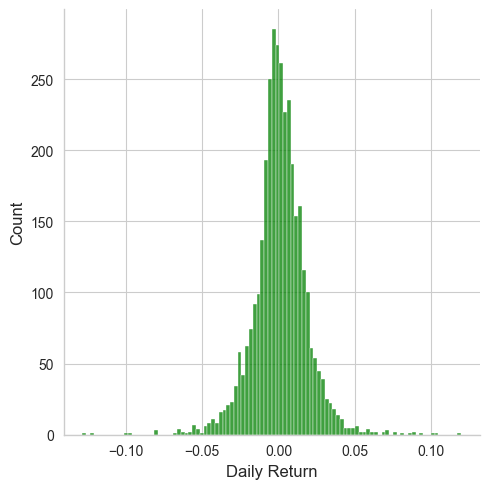

In [7]:
sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [8]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,7ma,14ma,21ma,MA5,MA10,...,14lower,21upper,21lower,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components,Daily Return
0,8.450000,8.481429,8.366071,8.423214,7.131088,8.227855,8.094737,7.976232,8.251143,8.140321,...,7.838133,8.487585,7.479966,93.433003,97.928200,99.677426,93.496539,85.442800,85.716090,0.001012
1,8.410357,8.450357,8.373571,8.392857,7.105389,8.269106,8.134486,8.014107,8.291357,8.179179,...,7.826632,8.501422,7.555074,93.162923,97.374329,98.756406,90.741494,77.927574,76.665885,-0.003604
2,8.478929,8.526071,8.312500,8.427500,7.134716,8.308704,8.173554,8.051688,8.357928,8.219607,...,7.815065,8.505032,7.642077,92.892805,96.819954,97.834811,87.992607,70.530080,67.764691,0.004128
3,8.392143,8.518214,8.384643,8.517500,7.210911,8.360903,8.219414,8.094035,8.412143,8.277607,...,7.817888,8.515909,7.725689,92.622653,96.265100,96.912734,85.252036,63.297895,59.099408,0.010679
4,8.507143,8.580000,8.464286,8.555000,7.242657,8.409427,8.264159,8.135941,8.463214,8.330429,...,7.827170,8.568768,7.742865,92.352470,95.709791,95.990265,82.521923,56.276628,50.753147,0.004403


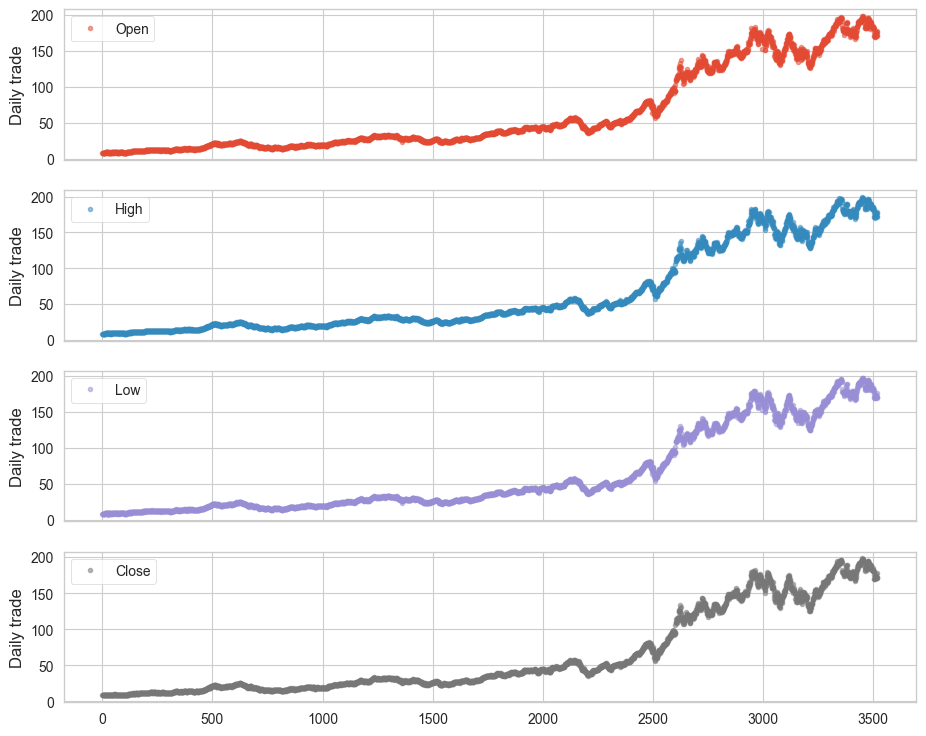

In [9]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Open        High         Low       Close   Adj Close         7ma  \
0       8.450000    8.481429    8.366071    8.423214    7.131088    8.227855   
1       8.410357    8.450357    8.373571    8.392857    7.105389    8.269106   
2       8.478929    8.526071    8.312500    8.427500    7.134716    8.308704   
3       8.392143    8.518214    8.384643    8.517500    7.210911    8.360903   
4       8.507143    8.580000    8.464286    8.555000    7.242657    8.409427   
...          ...         ...         ...         ...         ...         ...   
3516  174.339996  176.610001  173.029999  176.080002  176.080002  173.707135   
3517  175.720001  178.669998  175.089996  178.669998  178.669998  174.947851   
3518  177.050003  177.490005  170.839996  171.369995  171.369995  174.053387   
3519  171.759995  173.050003  170.059998  172.279999  172.279999  173.610040   
3520  170.570007  171.940002  169.449997  170.850006  170.850006  172.920031   

            14ma        21ma         MA

,count,mean,std,min,25%,50%,75%,max
Open,3521.0,62.778825,57.116060,8.315000,20.451786,35.314999,115.279999,198.020004
High,3521.0,63.446234,57.741495,8.450357,20.593571,35.470001,116.650002,199.619995
Low,3521.0,62.137677,56.532866,7.116071,20.259287,35.087502,113.620003,197.000000
Close,3521.0,62.821577,57.169632,8.392857,20.418571,35.262501,115.169998,198.110001
Adj Close,3521.0,60.758745,57.579942,7.105389,17.514305,32.917274,112.979355,197.857529
7ma,3521.0,62.681199,57.069541,8.227855,20.419649,35.162242,115.139157,196.196484
14ma,3521.0,62.515436,56.953846,8.094737,20.360538,35.002246,115.132907,194.577363
21ma,3521.0,62.346469,56.832214,7.976232,20.379933,34.747215,115.149224,193.164277
MA5,3521.0,62.728460,57.109624,8.251143,20.410714,35.214000,114.933998,197.294003
MA10,3521.0,62.610542,57.035468,8.140321,20.377572,35.132251,114.784000,195.958002


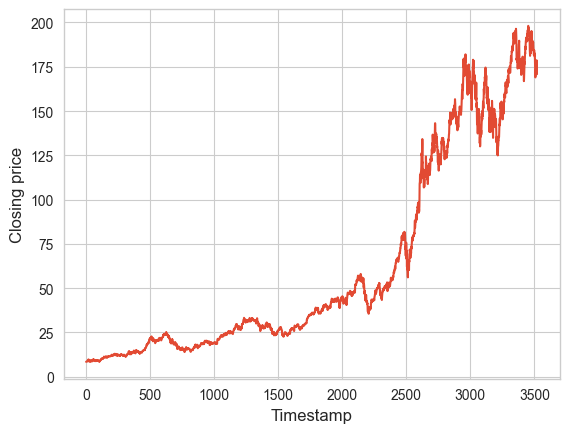

In [10]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [11]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2735
684


In [12]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =False)

Epoch 1/40
69/69 [==============================] - 4s 17ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0797 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0594
Epoch 2/40
69/69 [==============================] - 1s 9ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0614 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0508
Epoch 3/40
69/69 [==============================] - 1s 10ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0527 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0470
Epoch 4/40
69/69 [==============================] - 1s 11ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0502 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0474
Epoch 5/40
69/69 [==============================] - 1s 12ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0482 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0454
Epoch 6/40
69/69 [==============================] - 1s 12ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0478 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0455
Epoch 7/40
69/69 [=====

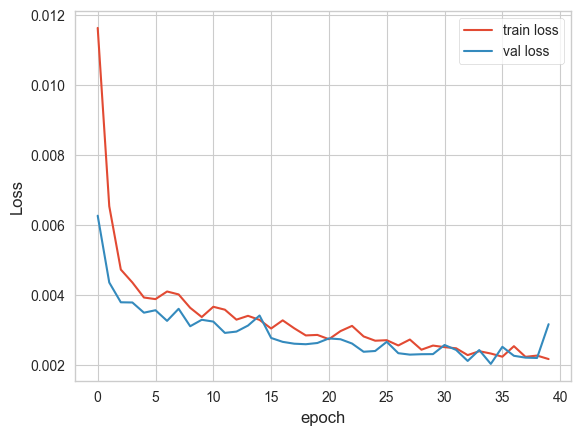

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

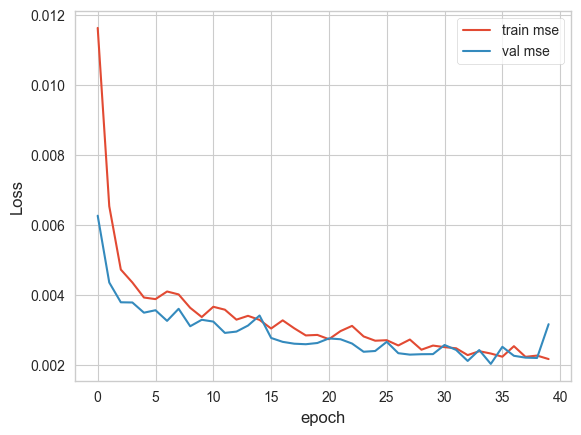

In [14]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

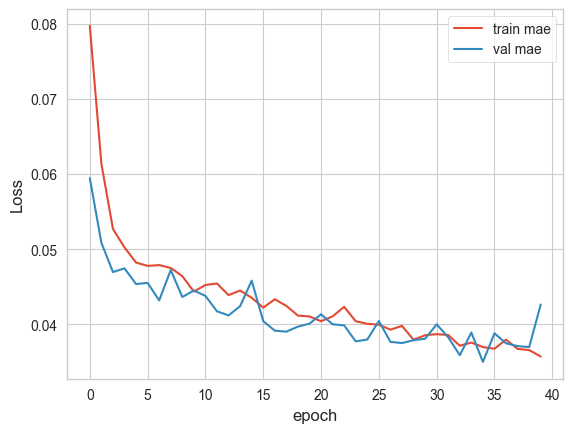

In [15]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [50]:
history.history

{'loss': [0.011626124382019043,
  0.0065275803208351135,
  0.004716103430837393,
  0.004346169531345367,
  0.003916715271770954,
  0.0038707819767296314,
  0.004089010413736105,
  0.004005080088973045,
  0.0036222427152097225,
  0.0033588088117539883,
  0.003651852486655116,
  0.0035687191411852837,
  0.003283569123595953,
  0.0033930232748389244,
  0.003276719246059656,
  0.0030303937382996082,
  0.003263883525505662,
  0.003036611247807741,
  0.0028326776809990406,
  0.0028470237739384174,
  0.0027247262187302113,
  0.002956000156700611,
  0.0031054706778377295,
  0.0028038015589118004,
  0.002681491896510124,
  0.002695841249078512,
  0.002545901807025075,
  0.002715093782171607,
  0.002424461767077446,
  0.0025424258783459663,
  0.002497219480574131,
  0.0024650434497743845,
  0.002269687596708536,
  0.0023815312888473272,
  0.0023149598855525255,
  0.0022242132108658552,
  0.002524825744330883,
  0.002220779424533248,
  0.0022561533842235804,
  0.002156798029318452],
 'mse': [0.01

In [16]:
from tensorflow.keras.utils import plot_model
model.summary()
# plot_model(model, to_file='CNN-LSTM-model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

In [17]:
model.evaluate(test_X, test_Y)

22/22 [==============================] - 0s 4ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0426


[0.003153781173750758, 0.003153781173750758, 0.04263173043727875]

In [18]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.915242
R2 Score: 0.915242
Max Error: 0.303582


22/22 [==============================] - 0s 3ms/step


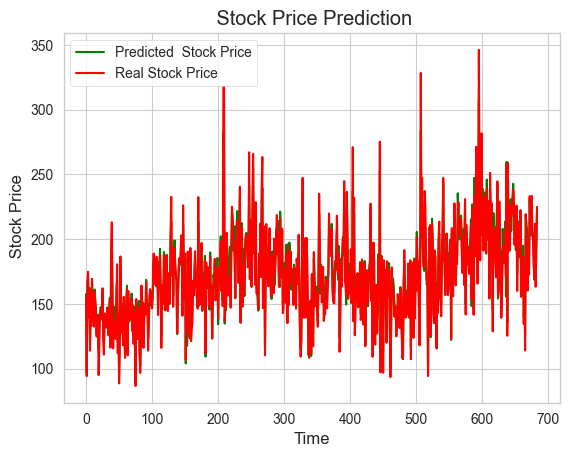

In [19]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

Testing part

<Figure size 1000x600 with 0 Axes>

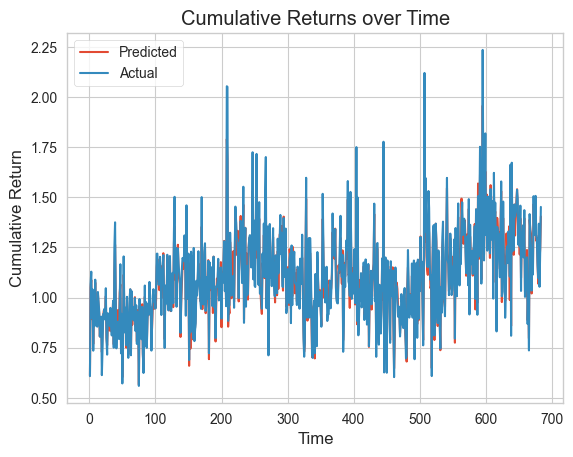

Predicted Final Cumulative Return: 1.4040212631225586
Actual Final Cumulative Return: 1.4518078581057592


In [20]:
results_df = pd.DataFrame({
    'Predicted_Price': predicted.flatten(),
    'Actual_Price': test_label.flatten()
})

results_df['Predicted_Return'] = results_df['Predicted_Price'].pct_change()
results_df['Actual_Return'] = results_df['Actual_Price'].pct_change()

results_df['Predicted_Cumulative_Return'] = (1 + results_df['Predicted_Return']).cumprod()
results_df['Actual_Cumulative_Return'] = (1 + results_df['Actual_Return']).cumprod()

plt.figure(figsize=(10, 6))
results_df[['Predicted_Cumulative_Return', 'Actual_Cumulative_Return']].plot()
plt.title('Cumulative Returns over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend(['Predicted', 'Actual'])
plt.show()

predicted_final_return = results_df['Predicted_Cumulative_Return'].iloc[-1]
actual_final_return = results_df['Actual_Cumulative_Return'].iloc[-1]

print(f"Predicted Final Cumulative Return: {predicted_final_return}")
print(f"Actual Final Cumulative Return: {actual_final_return}")

In [47]:
results_df

,Predicted_Price,Actual_Price,Predicted_Return,Actual_Return,Predicted_Cumulative_Return,Actual_Cumulative_Return
0,157.641663,154.899292,NaN,NaN,NaN,NaN
1,96.328552,94.203718,-0.388940,-0.391839,0.611060,0.608161
2,165.428436,165.522579,0.717335,0.757071,1.049395,1.068582
3,171.375488,174.877749,0.035949,0.056519,1.087121,1.128977
4,140.642944,139.200689,-0.179329,-0.204011,0.892169,0.898653
...,...,...,...,...,...,...
679,168.515076,169.966292,-0.087243,-0.056704,1.068976,1.097270
680,206.706482,211.944464,0.226635,0.246979,1.311244,1.368273
681,187.167740,163.219996,-0.094524,-0.229893,1.187299,1.053717
682,196.171768,190.484046,0.048107,0.167039,1.244417,1.229728


In [21]:

sharpe_ratio = np.mean(results_df['Predicted_Return']) / np.std(results_df['Predicted_Return']) * np.sqrt(252.)

print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: 1.6100569498866146


In [22]:
model.save("cnn-lstm-model.h5")

/Users/juwon/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
new_model = tf.keras.models.load_model("./cnn-lstm-model.h5")

In [24]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

In [25]:
data2 = pd.read_csv('../data/amzn.csv')
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

            Open        High         Low       Close   Adj Close     Volume
0       6.854500    6.864000    6.726000    6.726000    6.726000   90460000
1       6.812500    6.830500    6.657000    6.695000    6.695000  151998000
2       6.671500    6.774000    6.590500    6.734500    6.734500  177038000
3       6.730000    6.736500    6.582500    6.612500    6.612500  143576000
4       6.600500    6.616000    6.440000    6.500000    6.500000  220604000
...          ...         ...         ...         ...         ...        ...
3576  174.220001  176.089996  173.520004  175.899994  175.899994   26880900
3577  176.139999  178.529999  174.639999  178.149994  178.149994   29947200
3578  179.990005  181.419998  178.149994  178.149994  178.149994   32824300
3579  177.750000  179.259995  176.750000  178.869995  178.869995   27964100
3580  178.009995  180.990005  177.240005  179.710007  179.710007   29815500

[3581 rows x 6 columns]
2783
696


In [26]:
model.evaluate(test_X, test_Y)

22/22 [==============================] - 0s 3ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0596


[0.005795157980173826, 0.005795157980173826, 0.05959333851933479]

22/22 [==============================] - 0s 3ms/step


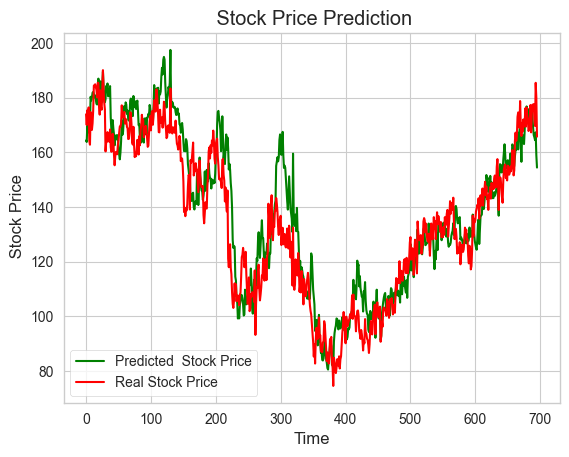

In [27]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# EDA

In [28]:
dataX = pd.read_csv('../data/data.csv')
dataY = pd.read_csv('../data/data.csv')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3521 non-null   object 
 1   Open              3521 non-null   float64
 2   High              3521 non-null   float64
 3   Low               3521 non-null   float64
 4   Close             3521 non-null   float64
 5   Adj Close         3521 non-null   float64
 6   Volume            3521 non-null   int64  
 7   pct_change        3521 non-null   float64
 8   log_change        3521 non-null   float64
 9   7ma               3521 non-null   float64
 10  14ma              3521 non-null   float64
 11  21ma              3521 non-null   float64
 12  MA5               3521 non-null   float64
 13  MA10              3521 non-null   float64
 14  5rasd             3521 non-null   float64
 15  10rasd            3521 non-null   float64
 16  7macd             3521 non-null   float64


In [29]:
dataX.head()


,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,...,21rsv,15wpr,14cci,next_rtn,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
0,2010-03-30,8.450000,8.481429,8.366071,8.423214,7.131088,527310000,0.014889,0.014779,8.227855,...,100.00000,-9.405788,152.679963,-0.003170,93.433003,97.928200,99.677426,93.496539,85.442800,85.716090
1,2010-03-31,8.410357,8.450357,8.373571,8.392857,7.105389,430659600,-0.003604,-0.003611,8.269106,...,96.79485,-14.310610,115.238857,-0.002081,93.162923,97.374329,98.756406,90.741494,77.927574,76.665885
2,2010-04-01,8.478929,8.526071,8.312500,8.427500,7.134716,603145200,0.004128,0.004119,8.308704,...,100.00000,-14.854614,101.262030,-0.006065,92.892805,96.819954,97.834811,87.992607,70.530080,67.764691
3,2010-04-05,8.392143,8.518214,8.384643,8.517500,7.210911,684507600,0.010679,0.010623,8.360903,...,100.00000,-1.291599,101.061564,0.014937,92.622653,96.265100,96.912734,85.252036,63.297895,59.099408
4,2010-04-06,8.507143,8.580000,8.464286,8.555000,7.242657,447017200,0.004403,0.004393,8.409427,...,100.00000,-3.484269,102.139991,0.005626,92.352470,95.709791,95.990265,82.521923,56.276628,50.753147


In [30]:
start_date = '2020-01-01'
end_date = '2021-11-29'

start = '2018-01-01'
end = '2020-01-01'

fill = (dataX['Date']>=start_date) & (dataX['Date']<=end_date)
dataX = dataX.loc[fill]
dataX

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,...,21rsv,15wpr,14cci,next_rtn,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
2457,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400,0.022816,0.022560,72.796680,...,100.000000,-0.751202,132.554473,0.013874,73.305678,65.136156,68.063175,74.460843,72.998112,73.889493
2458,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349144,146322800,-0.009722,-0.009770,73.186885,...,92.437161,-10.684233,111.676814,0.000942,73.464294,65.347077,68.318384,74.441202,73.540276,74.329617
2459,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200,0.007968,0.007937,73.627663,...,98.418125,-3.387038,93.169191,0.020457,73.623259,65.559044,68.574179,74.410866,74.099816,74.768731
2460,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582672,108872000,-0.004703,-0.004714,73.870123,...,94.137027,-11.235361,90.588712,-0.004836,73.782573,65.772053,68.830536,74.370111,74.672998,75.206018
2461,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200,0.016086,0.015958,74.351967,...,100.000000,-4.829984,96.738707,0.020292,73.942235,65.986098,69.087432,74.319228,75.255691,75.640604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,2021-11-22,161.679993,165.699997,161.000000,161.020004,158.998123,117467900,0.002927,0.002923,156.206183,...,100.000000,-25.686017,161.827051,-0.004082,158.959140,144.907174,163.390323,161.211524,161.342808,157.096957
2935,2021-11-23,161.119995,161.800003,159.059998,161.410004,159.383240,96041900,0.002422,0.002419,157.507138,...,100.000000,-23.545516,108.183665,0.001800,159.073088,144.935804,163.459798,161.553447,162.225498,158.286957
2936,2021-11-24,160.750000,162.139999,159.639999,161.940002,159.906586,69463600,0.003284,0.003278,158.615354,...,100.000000,-20.636631,96.117409,0.007403,159.186365,144.964753,163.526248,161.893578,163.079089,159.550390
2937,2021-11-26,159.570007,160.449997,156.360001,156.809998,154.840973,76959800,-0.031678,-0.032191,158.164015,...,63.539430,-48.792529,45.849963,-0.017297,159.298971,144.994032,163.589663,162.231634,163.901797,160.874996


In [31]:
fill2 = (dataY['Date']>=start) & (dataY['Date']<=end)
dataY = dataY.loc[fill2]
dataY

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,...,21rsv,15wpr,14cci,next_rtn,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
1954,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670979,102223600,0.017905,0.017746,42.924815,...,43.859627,-61.904826,-48.246764,0.012341,35.312316,45.319715,42.125197,42.939219,43.566029,44.047030
1955,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663895,118071600,-0.000174,-0.000174,42.957986,...,43.454786,-62.280750,2.778690,-0.001739,35.331353,45.369235,42.171826,42.945111,43.559695,44.094928
1956,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852776,89738400,0.004645,0.004634,43.032864,...,54.251043,-52.255644,0.422899,0.002840,35.350485,45.418426,42.218711,42.950343,43.543890,44.118753
1957,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317905,94640000,0.011385,0.011321,43.212148,...,80.836741,-27.568899,47.553429,0.008994,35.369714,45.467285,42.265853,42.954955,43.518240,44.117127
1958,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164436,82271200,-0.003714,-0.003721,43.305987,...,71.210134,-35.714190,49.080245,0.000000,35.389040,45.515810,42.313251,42.958990,43.482563,44.089287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.148003,48478800,0.000951,0.000950,70.107834,...,100.000000,-2.797949,91.305685,-0.001475,72.517862,64.097453,66.796693,74.390343,70.646690,71.703186
2453,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.519920,93121200,0.019840,0.019646,70.700251,...,100.000000,-0.279247,114.286521,0.017871,72.674721,64.303056,67.048639,74.427633,71.062072,72.135453
2454,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.493172,146266000,-0.000379,-0.000380,71.137687,...,99.638818,-14.349669,113.318947,-0.004534,72.831933,64.509733,67.301282,74.453139,71.506501,72.571226
2455,2019-12-30,72.364998,73.172501,71.305000,72.879997,70.911545,144114400,0.005935,0.005918,71.573265,...,100.000000,-8.715798,92.394436,0.007117,72.989497,64.717479,67.554601,74.467040,71.978634,73.009448


In [32]:
dataX.describe()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21rsv,15wpr,14cci,next_rtn,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
count,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,...,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,115.415975,116.800099,114.066239,115.495166,113.391212,1.246001e+08,0.001904,0.001619,114.955851,114.340658,...,65.525868,-37.399673,29.074181,0.001083,117.962756,117.318431,117.671311,115.534337,115.540553,115.480509
std,27.532649,27.570189,27.373438,27.472211,27.337873,6.412060e+07,0.023810,0.023816,27.316897,27.218312,...,34.073527,29.443967,83.745839,0.016893,26.208760,25.549441,27.069561,27.592574,27.367998,27.342675
min,57.020000,57.125000,53.152500,56.092499,54.707001,4.100000e+07,-0.128647,-0.137708,60.725569,62.521877,...,0.000000,-99.590609,-208.479748,-0.072579,73.305678,65.136156,68.063175,68.299462,63.088335,61.939134
25%,90.058748,91.270000,88.477497,90.122499,88.134388,8.097388e+07,-0.008591,-0.008628,88.977487,87.110309,...,36.258208,-62.621391,-40.574920,-0.007255,94.603672,95.818298,97.138769,91.310543,88.748766,91.045389
50%,122.564999,123.870003,120.545002,122.200001,120.015827,1.079710e+08,0.001535,0.001534,121.963399,122.005066,...,77.841840,-29.590885,49.167573,0.001119,118.663266,125.656960,115.249624,126.270539,121.602945,122.287411
75%,135.812500,136.905006,133.750004,135.095005,132.784096,1.480874e+08,0.013978,0.013881,134.953996,133.859800,...,97.426487,-11.503462,93.666434,0.011215,141.773092,140.973430,140.453002,134.391179,135.623608,135.467468
max,161.679993,165.699997,161.000000,161.940002,159.906586,4.265100e+08,0.119808,0.113157,158.683013,156.358504,...,100.000000,-0.029771,183.774315,0.062583,159.410903,145.023649,163.650036,162.567329,164.692347,162.246590


In [33]:
dataY.describe()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21rsv,15wpr,14cci,next_rtn,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,49.627227,50.107908,49.186635,49.668444,47.684899,1.240777e+08,0.001247,0.001096,49.494558,49.309949,...,65.558912,-37.751223,28.469520,0.000806,48.198091,49.038480,49.127581,49.913434,49.661044,49.673094
std,7.451311,7.477226,7.448893,7.500195,7.502577,5.277873e+07,0.017354,0.017413,7.232772,6.946296,...,36.026253,31.158087,84.693842,0.012436,10.901044,4.287232,5.051441,8.144134,7.418523,7.451001
min,35.994999,36.430000,35.500000,35.547501,34.075401,4.544800e+07,-0.099607,-0.104924,37.753640,38.397147,...,0.000000,-100.000000,-176.170155,-0.040362,35.312316,45.319715,42.125197,39.458763,37.964926,37.959674
25%,43.865000,44.332500,43.588751,43.878750,41.870335,8.701420e+07,-0.006738,-0.006761,43.841424,43.615023,...,32.812620,-64.132640,-43.599189,-0.005893,38.675470,46.445561,45.985778,43.479418,43.667816,44.063551
50%,47.974998,48.549999,47.762501,48.145000,46.039433,1.110428e+08,0.001645,0.001644,47.935974,47.768603,...,80.737048,-28.597812,47.793806,0.000840,45.080663,47.742284,48.130080,48.701931,48.138458,47.923351
75%,54.039999,54.740000,53.375000,53.868752,51.638680,1.460904e+08,0.010234,0.010182,53.836240,53.367268,...,98.995575,-9.360562,96.504747,0.007747,56.216681,48.458071,49.890649,52.438307,53.659831,54.081639
max,72.779999,73.492500,72.379997,73.412498,71.429672,3.849868e+08,0.070422,0.068053,72.033073,70.747332,...,100.000000,-0.070088,201.891630,0.059811,73.147412,64.926289,67.808573,74.469535,72.476620,73.449162


/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/204209456.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(dataX['Close'])
/Users/juwon/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/204209456.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot`

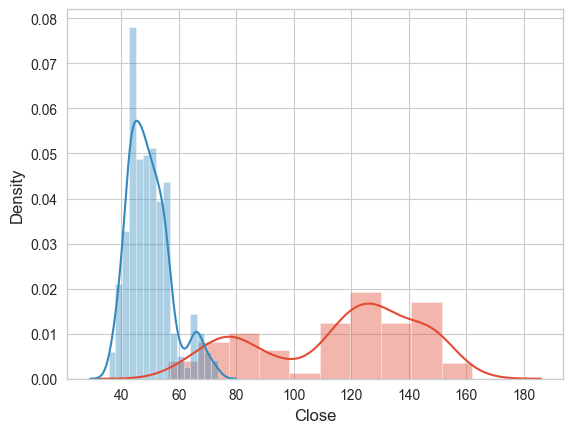

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

sns_plot = sns.distplot(dataX['Close'])
sns_plot2 = sns.distplot(dataY['Close'])

/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/1660271226.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataX['Close'], ax = ax[0,1])
/Users/juwon/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/1660271226.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

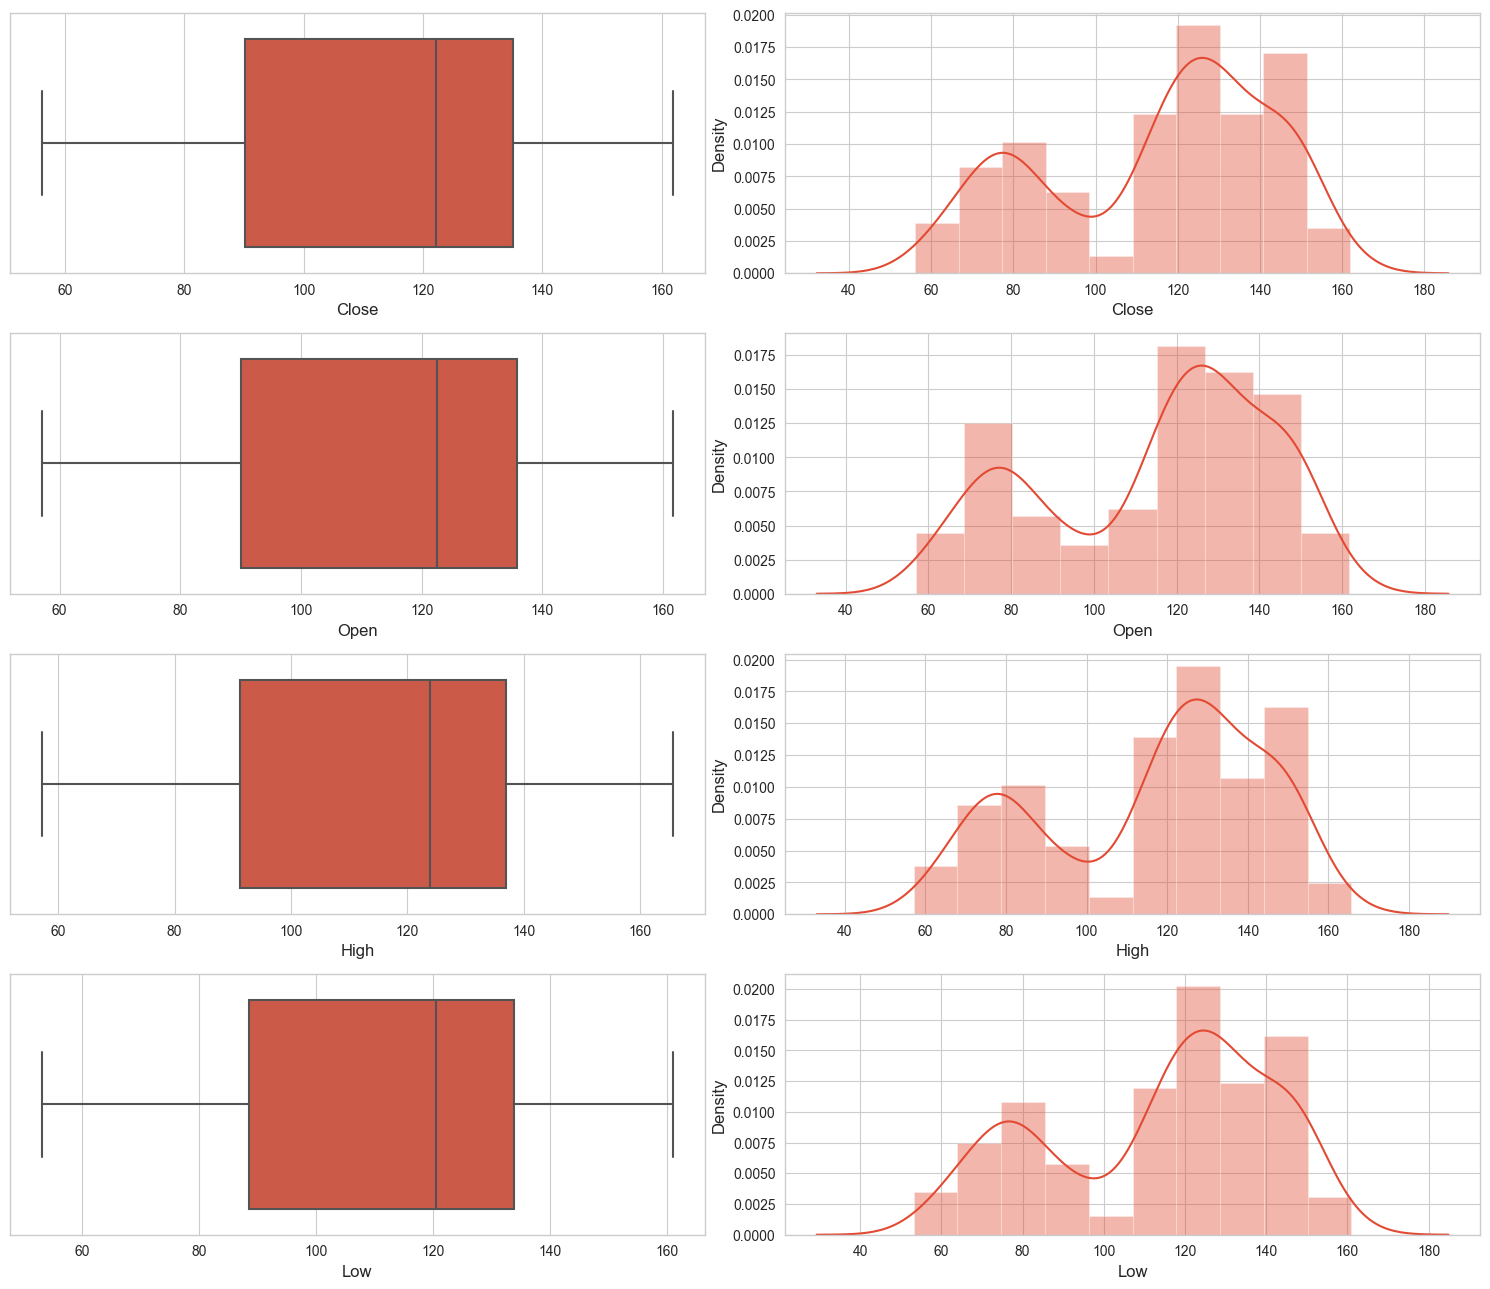

In [35]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["Close"], ax = ax[0,0])
sns.distplot(dataX['Close'], ax = ax[0,1])
sns.boxplot(x= dataX["Open"], ax = ax[1,0])
sns.distplot(dataX['Open'], ax = ax[1,1])
sns.boxplot(x= dataX["High"], ax = ax[2,0])
sns.distplot(dataX['High'], ax = ax[2,1])
sns.boxplot(x= dataX["Low"], ax = ax[3,0])
sns.distplot(dataX['Low'], ax = ax[3,1])
plt.tight_layout()

Close               1.000000
Adj Close           0.999954
Low                 0.999896
High                0.999891
Open                0.999773
MA5                 0.999607
7ma                 0.999587
MA10                0.999097
14ma                0.999050
7lower              0.998998
7upper              0.998994
21ma                0.998526
14upper             0.998156
14lower             0.998082
21upper             0.997408
FT_100components    0.997295
21lower             0.997108
FT_81components     0.996755
FT_27components     0.990371
FT_9components      0.969421
FT_6components      0.949284
FT_3components      0.912781
21atr               0.888944
14atr               0.880075
7atr                0.863420
10rasd              0.851923
5rasd               0.808278
Daily Return        0.003181
Name: Close, dtype: float64


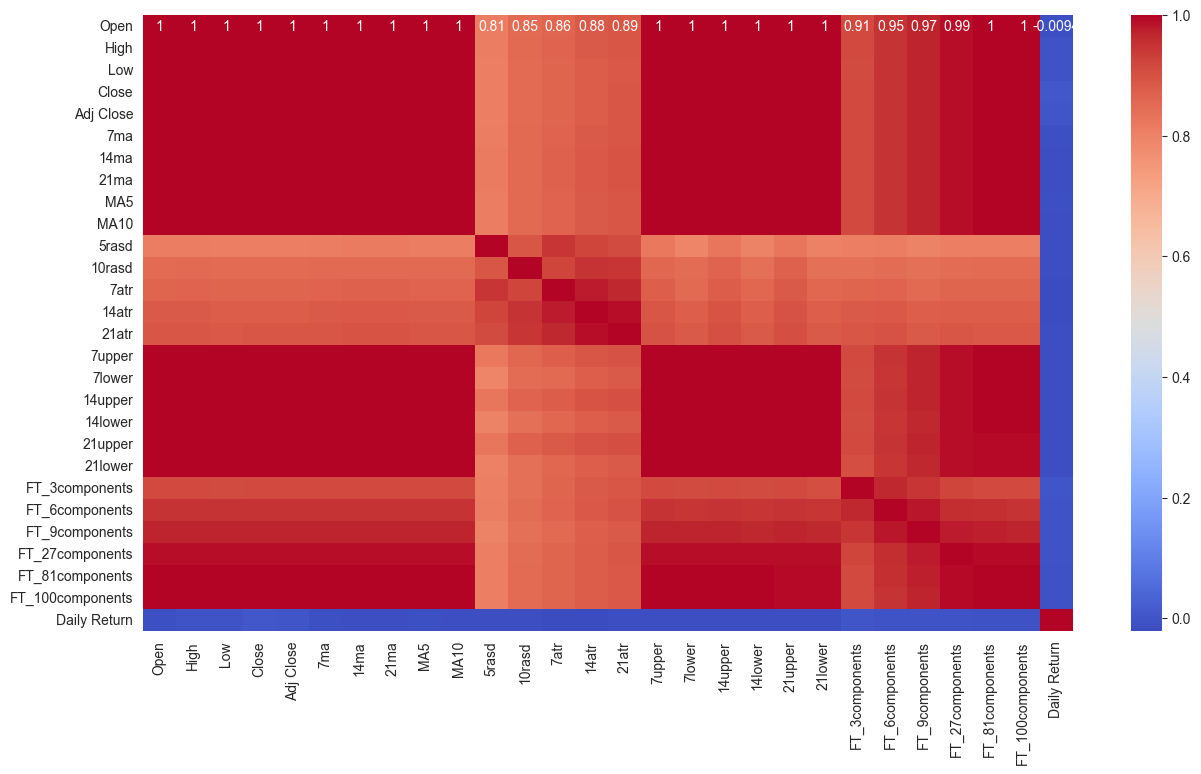

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation_matrix = data.corr()

# 'Close'와 상관관계가 높은 특징들을 정렬하여 추출
highly_correlated_features = correlation_matrix['Close'].sort_values(ascending=False)

# 상관관계가 높은 특징들 출력
print(highly_correlated_features)

# 상관관계 히트맵 시각화
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

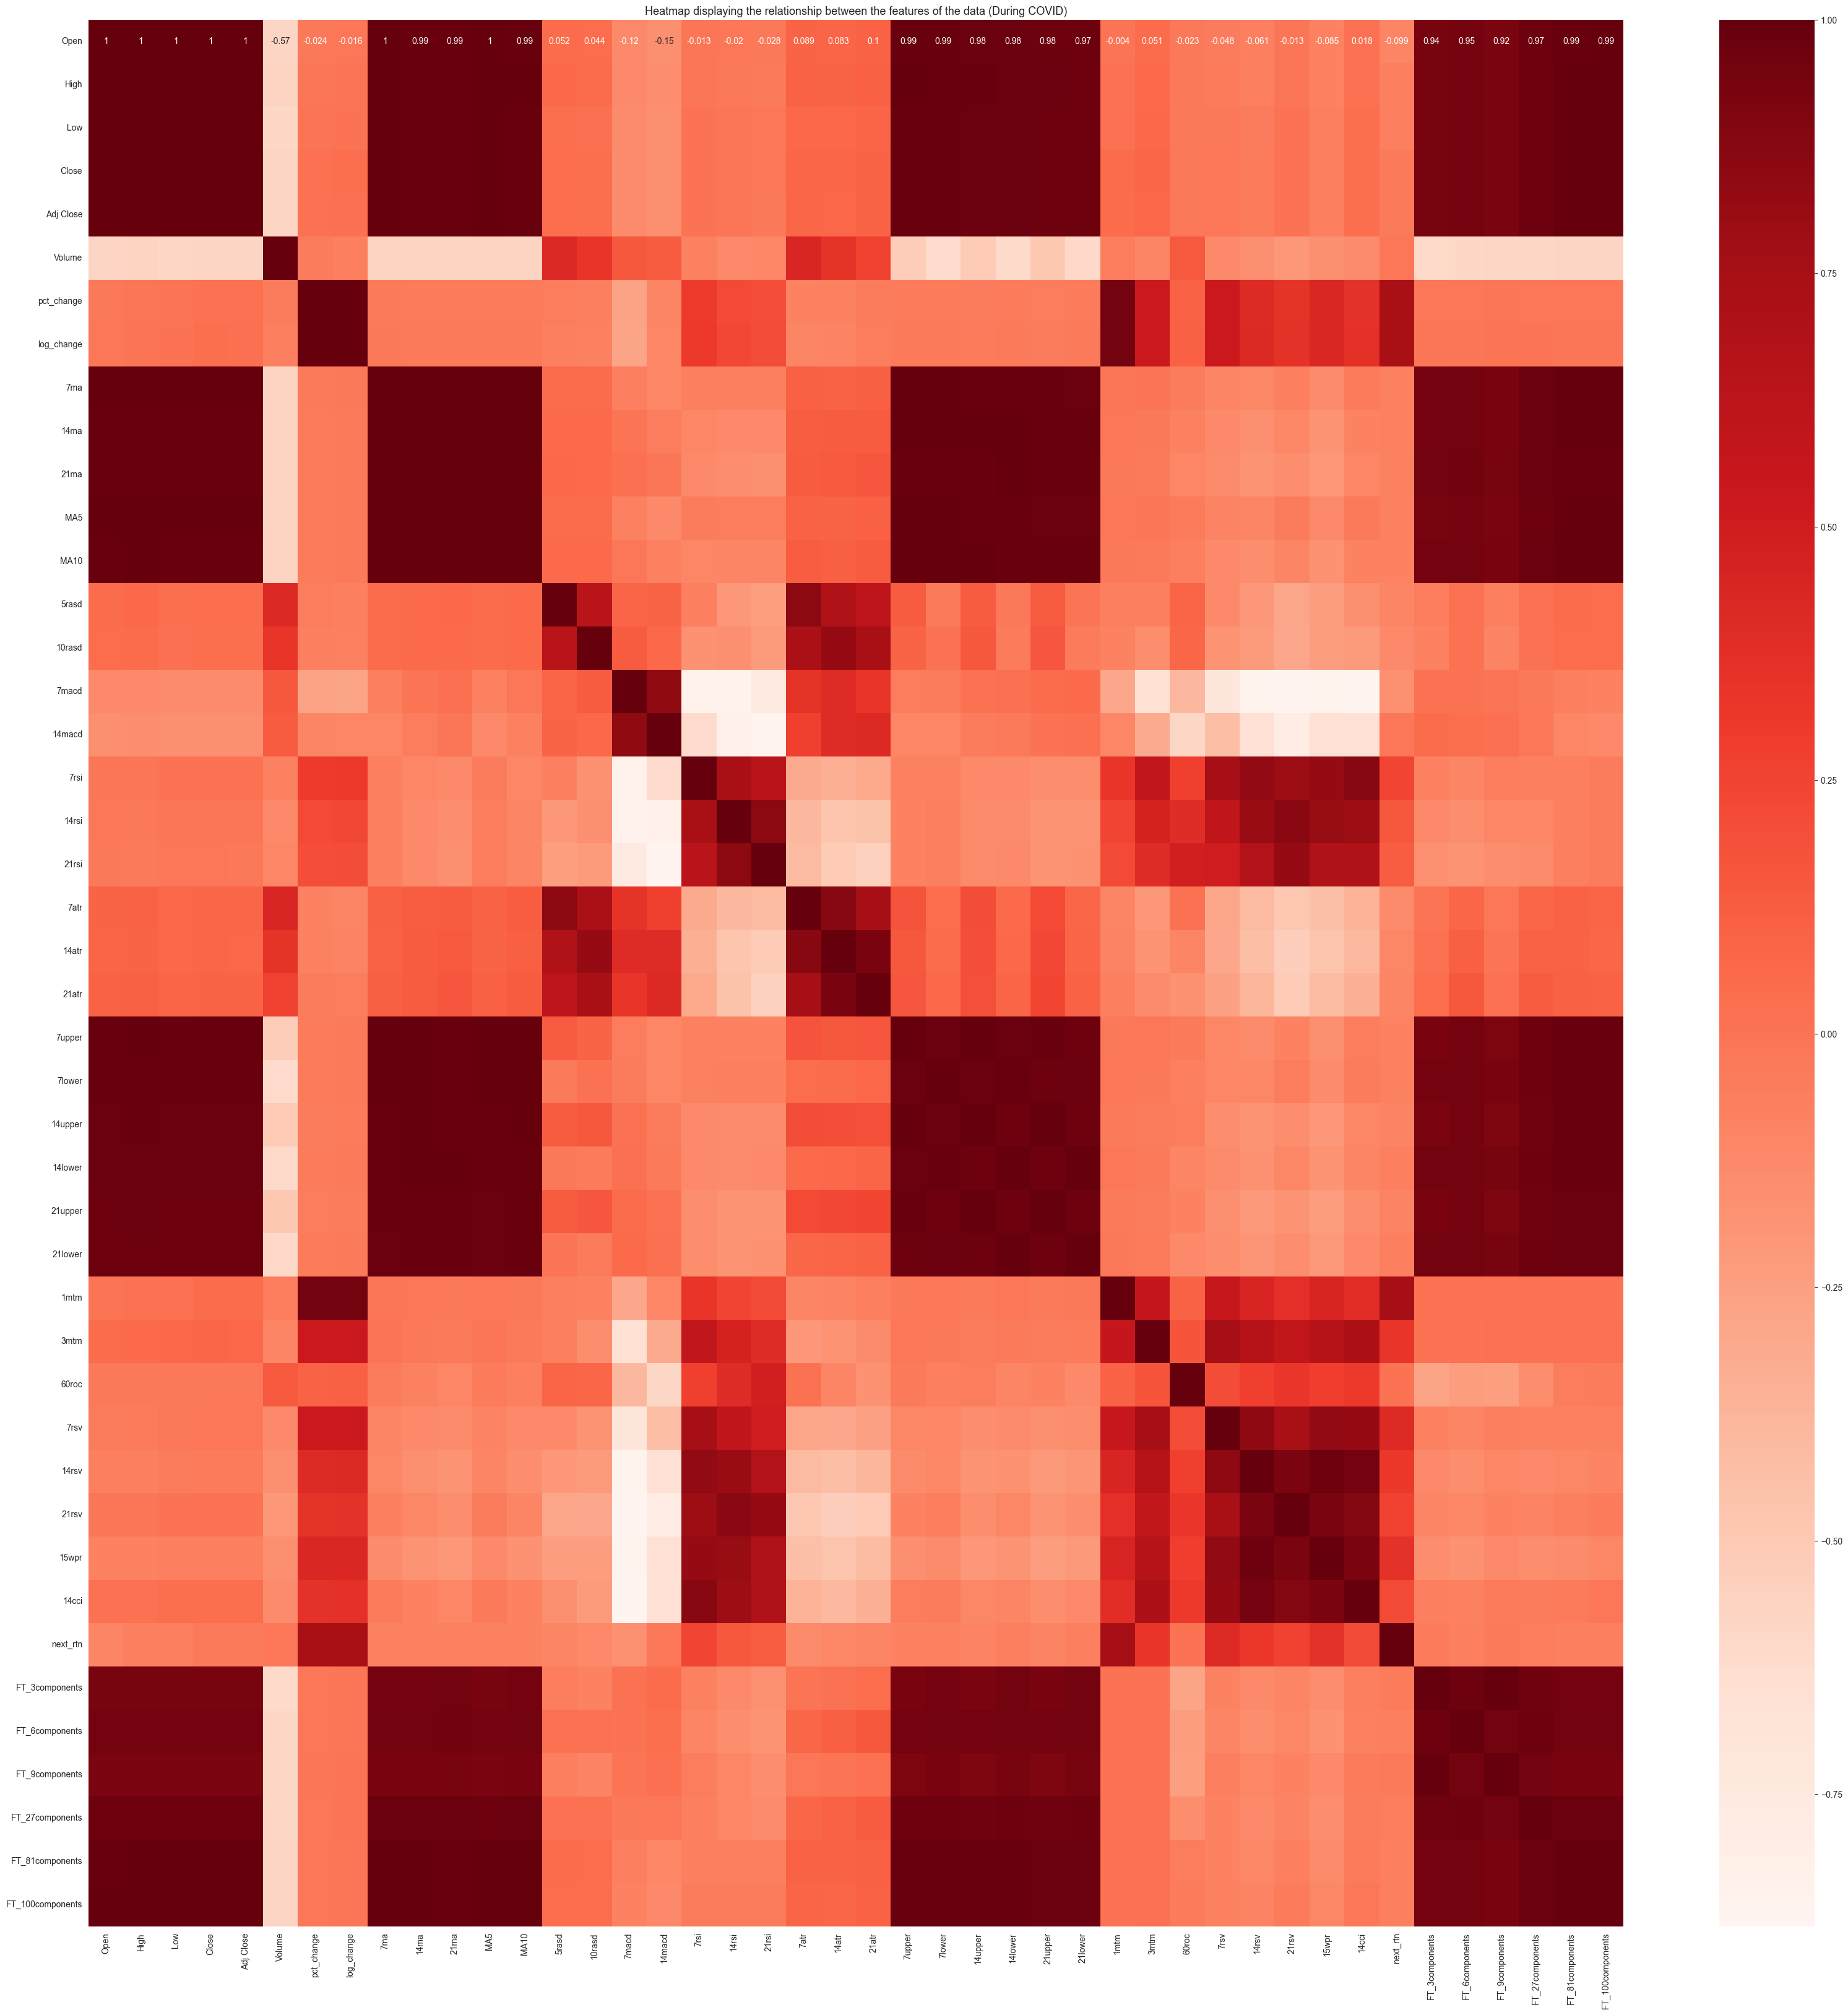

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = dataX.select_dtypes(include=[np.number])

plt.figure(figsize=(40, 40))
sns.heatmap(numeric_df.corr(), cmap=plt.cm.Reds, annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (During COVID)',
          fontsize=13)
plt.show()

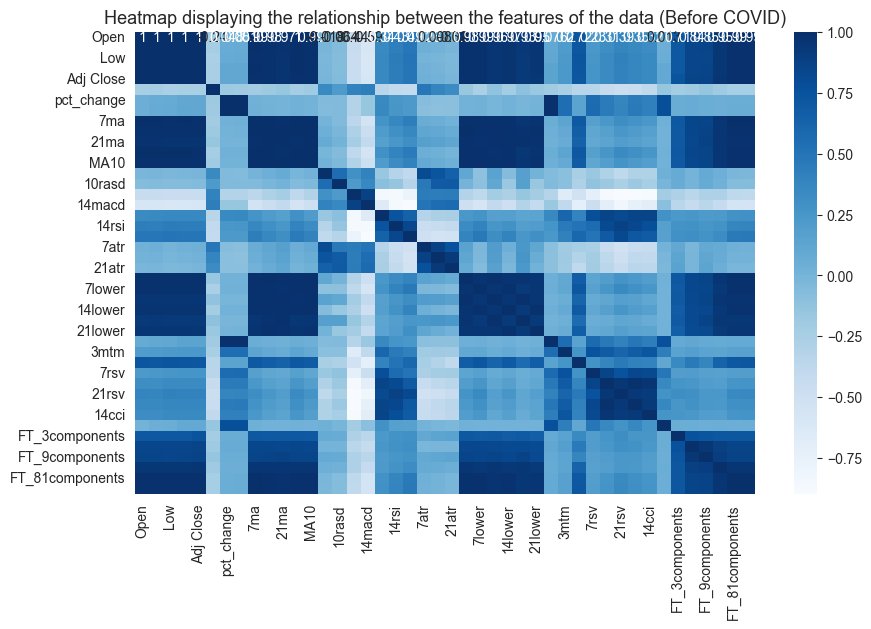

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = dataY.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (Before COVID)',
         fontsize=13)
plt.show()

In [39]:
dataX = pd.read_csv('../data/amzn.csv')
dataY = pd.read_csv('../data/amzn.csv')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3581 non-null   object 
 1   Open       3581 non-null   float64
 2   High       3581 non-null   float64
 3   Low        3581 non-null   float64
 4   Close      3581 non-null   float64
 5   Adj Close  3581 non-null   float64
 6   Volume     3581 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 196.0+ KB


In [40]:
start_date = '2020-01-01'
end_date = '2021-11-29'

start = '2018-01-01'
end = '2020-01-01'

fill = (dataX['Date']>=start_date) & (dataX['Date']<=end_date)
dataX = dataX.loc[fill]
dataX

,Date,Open,High,Low,Close,Adj Close,Volume
2517,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2518,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2519,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2520,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2521,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...,...
2994,2021-11-22,183.819000,185.673004,178.375000,178.628494,178.628494,96844000
2995,2021-11-23,179.251999,181.052505,176.385498,179.001999,179.001999,73804000
2996,2021-11-24,178.133499,180.682007,176.842499,179.020493,179.020493,46560000
2997,2021-11-26,180.104996,181.675003,175.207504,175.227997,175.227997,59826000


In [41]:
fill2 = (dataY['Date']>=start) & (dataY['Date']<=end)
dataY = dataY.loc[fill2]
dataY

,Date,Open,High,Low,Close,Adj Close,Volume
2014,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2015,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2016,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2017,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018,2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...,...
2512,2019-12-24,89.690498,89.778503,89.378998,89.460503,89.460503,17626000
2513,2019-12-26,90.050499,93.523003,89.974998,93.438499,93.438499,120108000
2514,2019-12-27,94.146004,95.070000,93.300499,93.489998,93.489998,123732000
2515,2019-12-30,93.699997,94.199997,92.030998,92.344498,92.344498,73494000


/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/4160715633.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(dataX['Close'])
/Users/juwon/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/4160715633.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

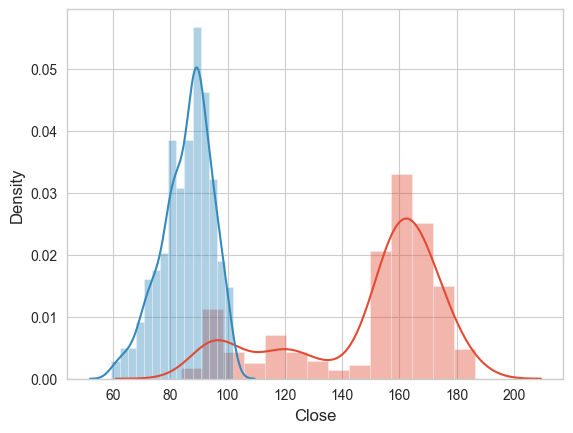

In [42]:
sns_plot = sns.distplot(dataX['Close'])
sns_plot2 = sns.distplot(dataY['Close'])

/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/1660271226.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataX['Close'], ax = ax[0,1])
/Users/juwon/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/1660271226.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

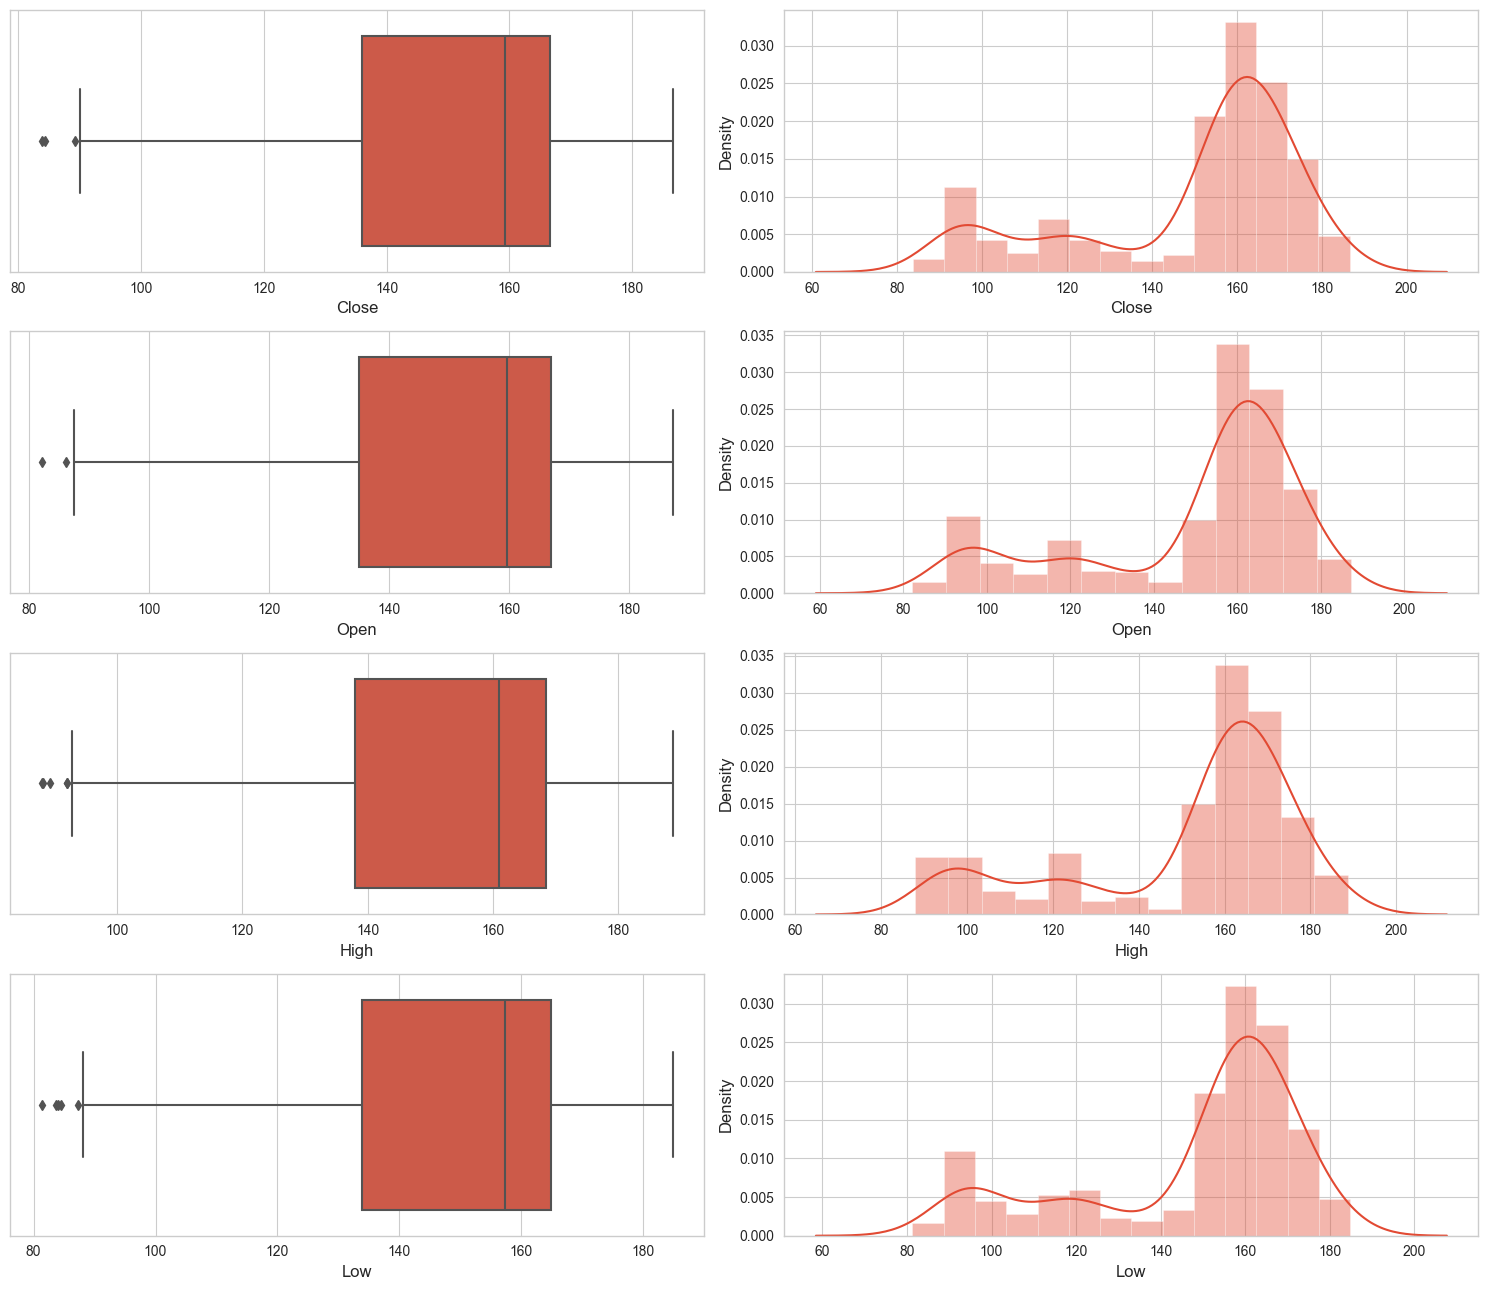

In [43]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["Close"], ax = ax[0,0])
sns.distplot(dataX['Close'], ax = ax[0,1])
sns.boxplot(x= dataX["Open"], ax = ax[1,0])
sns.distplot(dataX['Open'], ax = ax[1,1])
sns.boxplot(x= dataX["High"], ax = ax[2,0])
sns.distplot(dataX['High'], ax = ax[2,1])
sns.boxplot(x= dataX["Low"], ax = ax[3,0])
sns.distplot(dataX['Low'], ax = ax[3,1])
plt.tight_layout()

/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/3010905393.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataY['Close'], ax = ax[0,1])
/Users/juwon/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_45636/3010905393.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

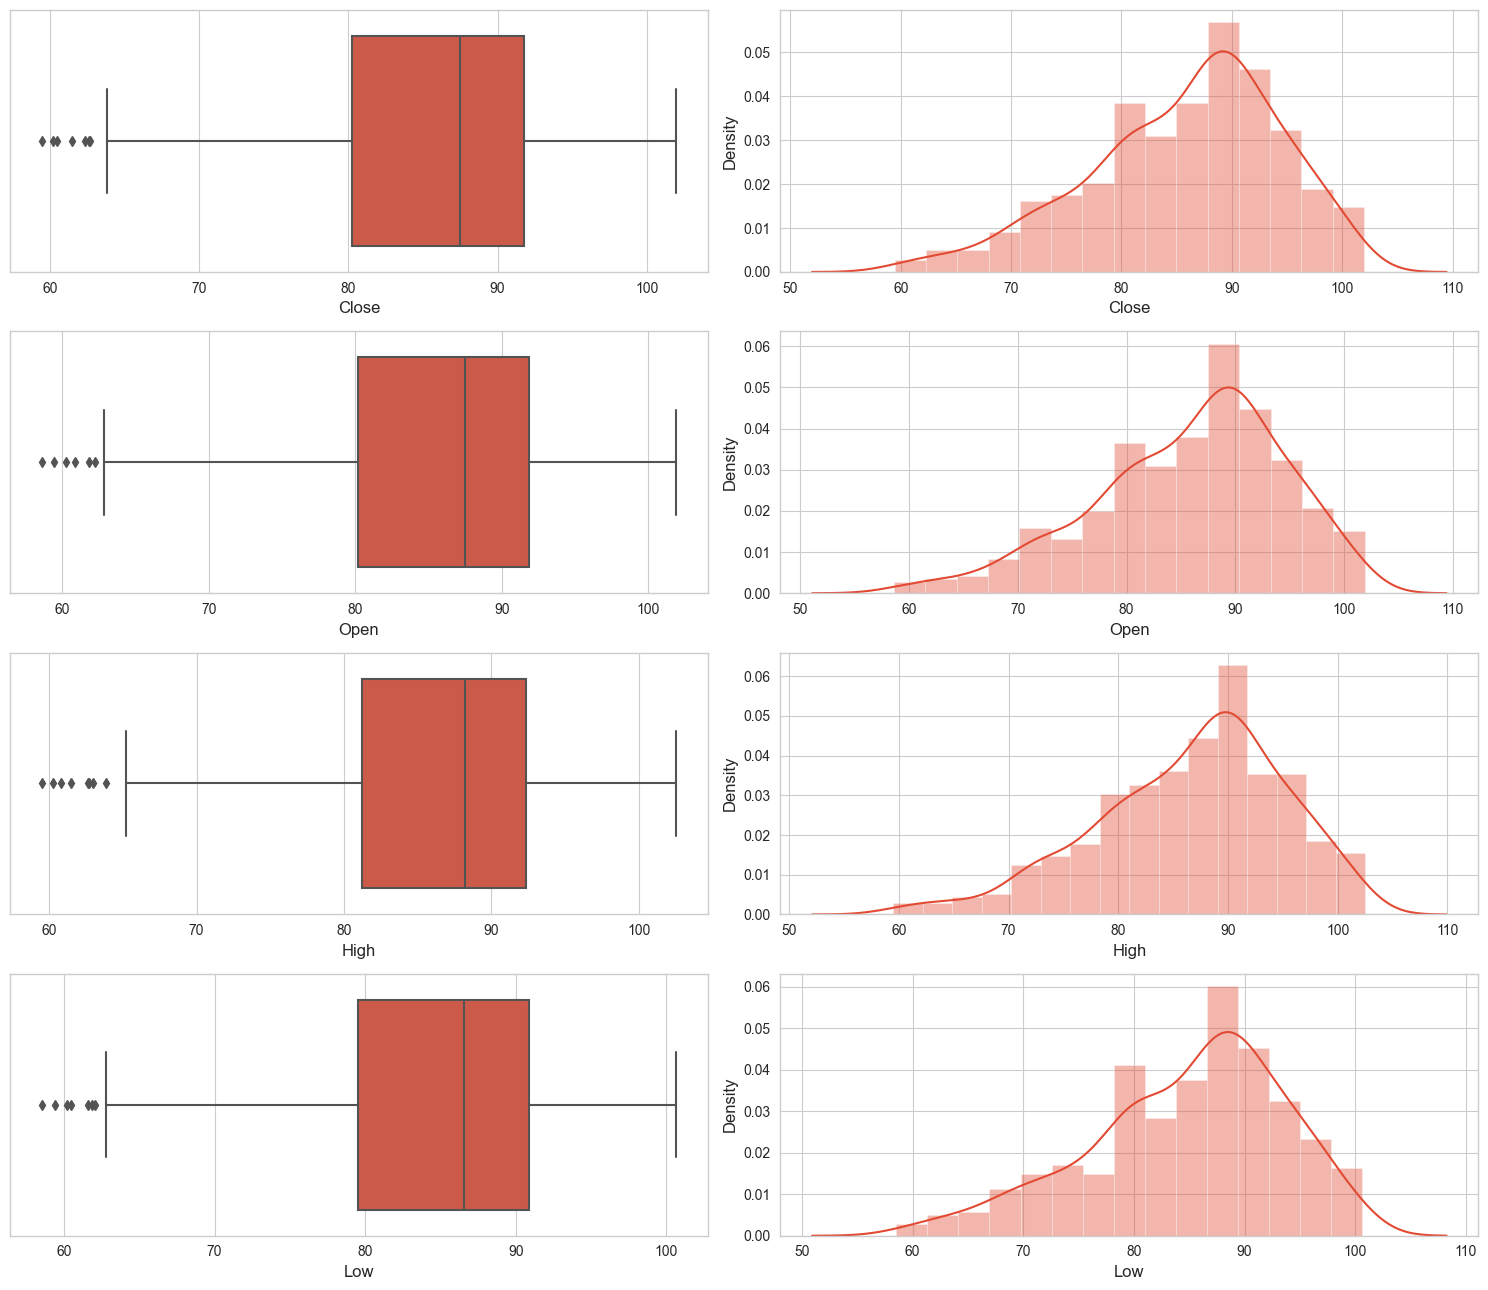

In [44]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataY["Close"], ax = ax[0,0])
sns.distplot(dataY['Close'], ax = ax[0,1])
sns.boxplot(x= dataY["Open"], ax = ax[1,0])
sns.distplot(dataY['Open'], ax = ax[1,1])
sns.boxplot(x= dataY["High"], ax = ax[2,0])
sns.distplot(dataY['High'], ax = ax[2,1])
sns.boxplot(x= dataY["Low"], ax = ax[3,0])
sns.distplot(dataY['Low'], ax = ax[3,1])
plt.tight_layout()

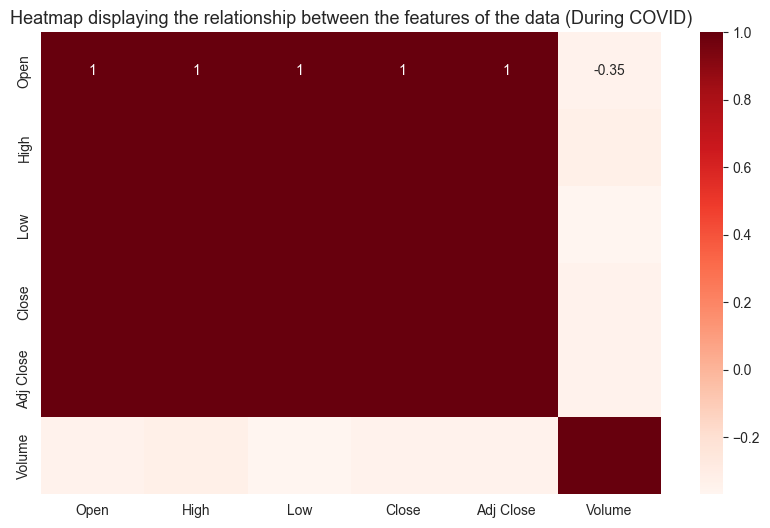

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = dataX.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap=plt.cm.Reds, annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (During COVID)',
          fontsize=13)
plt.show()

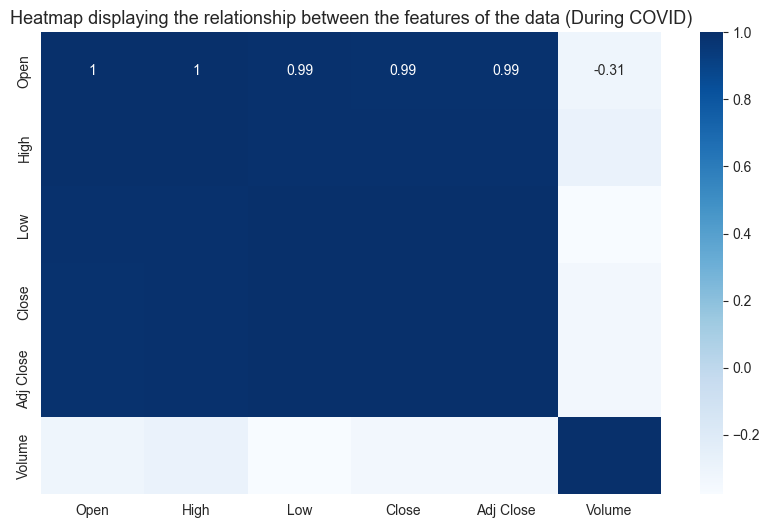

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = dataY.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap=plt.cm.Blues, annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (During COVID)',
          fontsize=13)
plt.show()